# Decaying Homogeneous Isotropic Turbulence 2D (DHIT)

This test case considers decaying homogeneous isotropic turbulence.

In [1]:
using FFTW
using IncompressibleNavierStokes
using LaTeXStrings

if haskey(ENV, "GITHUB_ACTIONS")
    using CairoMakie
else
    using GLMakie
end

Case name for saving results

In [2]:
name = "DecayingTurbulence2D"

"DecayingTurbulence2D"

Floating point type for simulations

In [3]:
T = Float64

Float64

Viscosity model

In [4]:
viscosity_model = LaminarModel{T}(; Re = 10000)
# viscosity_model = MixingLengthModel{T}(; Re = 1000)
# viscosity_model = SmagorinskyModel{T}(; Re = 1000)
# viscosity_model = QRModel{T}(; Re = 1000)

LaminarModel{Float64}(10000.0)

Convection model

In [5]:
convection_model = NoRegConvectionModel()
# convection_model = C2ConvectionModel()
# convection_model = C4ConvectionModel()
# convection_model = LerayConvectionModel()

NoRegConvectionModel()

Boundary conditions

In [6]:
u_bc(x, y, t) = zero(x)
v_bc(x, y, t) = zero(x)
boundary_conditions = BoundaryConditions(
    u_bc,
    v_bc;
    bc_unsteady = false,
    bc_type = (;
        u = (; x = (:periodic, :periodic), y = (:periodic, :periodic)),
        v = (; x = (:periodic, :periodic), y = (:periodic, :periodic)),
    ),
    T,
)

BoundaryConditions{Float64}(false, (x = (:periodic, :periodic), y = (:periodic, :periodic)), (x = (:periodic, :periodic), y = (:periodic, :periodic)), NamedTuple(), NamedTuple(), NamedTuple(), NamedTuple(), Main.var"##317".u_bc, Main.var"##317".v_bc, IncompressibleNavierStokes.var"#43#67"(), IncompressibleNavierStokes.var"#44#68"(), IncompressibleNavierStokes.var"#45#69"(), IncompressibleNavierStokes.var"#46#70"(), (x = (0.0, 0.0), y = (0.0, 0.0)), (x = (0.0, 0.0), y = (0.0, 0.0)), (x = (0.0, 0.0), y = (0.0, 0.0)))

Grid

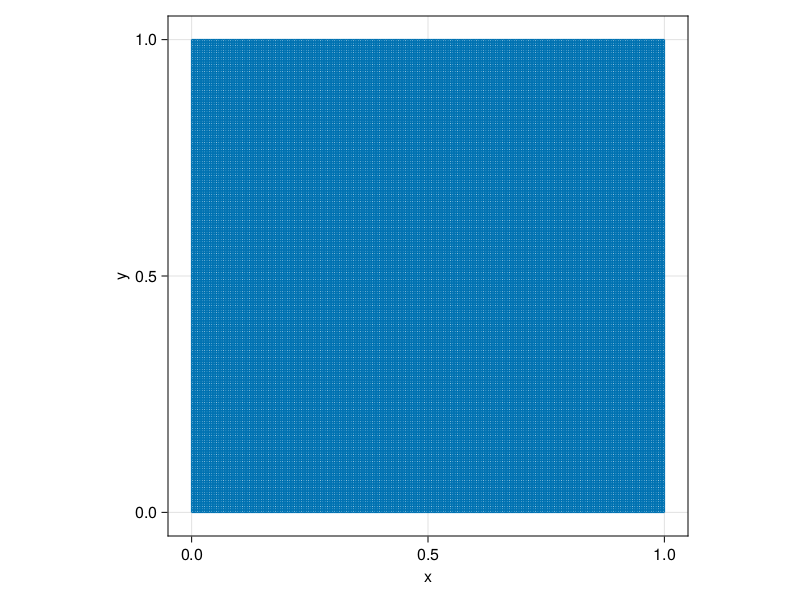

In [7]:
N = 200
x = stretched_grid(0, 1, N)
y = stretched_grid(0, 1, N)
grid = Grid(x, y; boundary_conditions, T);

plot_grid(grid)

Forcing parameters

In [8]:
bodyforce_u(x, y) = 0
bodyforce_v(x, y) = 0
force = SteadyBodyForce(bodyforce_u, bodyforce_v, grid)

SteadyBodyForce{typeof(Main.var"##317".bodyforce_u), typeof(Main.var"##317".bodyforce_v), Nothing, Float64}(Main.var"##317".bodyforce_u, Main.var"##317".bodyforce_v, nothing, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

Build setup and assemble operators

In [9]:
setup = Setup(; viscosity_model, convection_model, grid, force, boundary_conditions)

Setup{Float64, 2, LaminarModel{Float64}, NoRegConvectionModel, SteadyBodyForce{typeof(Main.var"##317".bodyforce_u), typeof(Main.var"##317".bodyforce_v), Nothing, Float64}}(Grid{Float64, 2}(false, 81.0, 1.125, 200, 200, 1, (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), [0.0, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045  …  0.955, 0.96, 0.965, 0.97, 0.975, 0.98, 0.985, 0.99, 0.995, 1.0], [0.0, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045  …  0.955, 0.96, 0.965, 0.97, 0.975, 0.98, 0.985, 0.99, 0.995, 1.0], Float64[], [0.0025, 0.0075, 0.0125, 0.017499999999999998, 0.0225, 0.027500000000000004, 0.0325, 0.0375, 0.0425, 0.04750000000000001  …  0.9525, 0.9575, 0.9624999999999999, 0.9675000000000001, 0.9725000000000001, 0.9775000000000001, 0.9825000000000002, 0.9875, 0.9925, 0.9975], [0.0025, 0.0075, 0.0125, 0.017499999999999998, 0.0225, 0.027500000000000004, 0.0325, 0.0375, 0.0425, 0.04750000000000001  …  0.9525, 0.9575, 0.9624999999999999, 0.9675000000000001, 0.9725000000000001

Pressure solver

In [10]:
# pressure_solver = DirectPressureSolver(setup)
# pressure_solver = CGPressureSolver(setup; maxiter = 500, abstol = 1e-8)
pressure_solver = FourierPressureSolver(setup)

FourierPressureSolver{Float64, 2}(ComplexF64[1.0 + 0.0im 0.0009868792685368858 + 0.0im … 0.003946543143456861 + 0.0im 0.0009868792685368904 + 0.0im; 0.0009868792685368858 + 0.0im 0.0019737585370737717 + 0.0im … 0.004933422411993747 + 0.0im 0.0019737585370737764 + 0.0im; … ; 0.003946543143456861 + 0.0im 0.004933422411993747 + 0.0im … 0.007893086286913722 + 0.0im 0.004933422411993751 + 0.0im; 0.0009868792685368904 + 0.0im 0.0019737585370737764 + 0.0im … 0.004933422411993751 + 0.0im 0.001973758537073781 + 0.0im], ComplexF64[2.939659526e-315 + 1.80653159e-315im -199.99999999999983 + 199.99999999999983im … -199.99999999999983 + 199.99999999999983im -199.99999999999983 + 199.99999999999983im; 0.0 + 0.0im -199.99999999999983 + 199.99999999999983im … -199.99999999999983 + 199.99999999999983im -199.99999999999983 + 199.99999999999983im; … ; -199.99999999999983 + 199.99999999999983im -199.99999999999983 + 199.99999999999983im … -199.99999999999983 + 199.99999999999983im -199.99999999999983 + 199

Initial conditions

In [11]:
K = N ÷ 2
σ = 30
# σ = 10
s = 5
function create_spectrum(K)
    a =
        1e6 * [
            1 / sqrt((2π)^2 * 2σ^2) *
            exp(-((i - s)^2 + (j - s)^2) / 2σ^2) *
            exp(-2π * im * rand()) for i = 1:K, j = 1:K
        ]
    [
        a reverse(a; dims = 2)
        reverse(a; dims = 1) reverse(a)
    ]
end
u = real.(ifft(create_spectrum(K)))
v = real.(ifft(create_spectrum(K)))
V = [reshape(u, :); reshape(v, :)]
f = setup.operators.M * V
p = zero(f)

40000-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

Boundary conditions

In [12]:
set_bc_vectors!(setup, 0.0)

Setup{Float64, 2, LaminarModel{Float64}, NoRegConvectionModel, SteadyBodyForce{typeof(Main.var"##317".bodyforce_u), typeof(Main.var"##317".bodyforce_v), Nothing, Float64}}(Grid{Float64, 2}(false, 81.0, 1.125, 200, 200, 1, (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), [0.0, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045  …  0.955, 0.96, 0.965, 0.97, 0.975, 0.98, 0.985, 0.99, 0.995, 1.0], [0.0, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045  …  0.955, 0.96, 0.965, 0.97, 0.975, 0.98, 0.985, 0.99, 0.995, 1.0], Float64[], [0.0025, 0.0075, 0.0125, 0.017499999999999998, 0.0225, 0.027500000000000004, 0.0325, 0.0375, 0.0425, 0.04750000000000001  …  0.9525, 0.9575, 0.9624999999999999, 0.9675000000000001, 0.9725000000000001, 0.9775000000000001, 0.9825000000000002, 0.9875, 0.9925, 0.9975], [0.0025, 0.0075, 0.0125, 0.017499999999999998, 0.0225, 0.027500000000000004, 0.0325, 0.0375, 0.0425, 0.04750000000000001  …  0.9525, 0.9575, 0.9624999999999999, 0.9675000000000001, 0.9725000000000001

Make velocity field divergence free

In [13]:
(; Ω⁻¹) = setup.grid
(; G, M, yM) = setup.operators
f = M * V + yM
Δp = IncompressibleNavierStokes.pressure_poisson(pressure_solver, f)
V .-= Ω⁻¹ .* (G * Δp)
p = IncompressibleNavierStokes.pressure_additional_solve(pressure_solver, V, p, 0.0, setup)

V₀, p₀ = V, p

([-14.301759010736848, -12.429949521686401, -10.030743195654335, -8.89445206125759, -9.274672451922134, -10.058468183585923, -10.737914328984786, -10.714685659826484, -9.79424315470115, -7.940090347360127  …  -5.338132480366909, -1.016560736801278, 2.3844010819355534, 1.7490595666139643, -2.975891327318944, -5.024971433570584, -3.7055011391032853, -2.564537221941458, -0.3686799980686866, 3.9923613441208925], [-25.313604364310784, -17.243568715720684, -13.855136381492077, -10.81582816490699, -12.283112065104177, -17.89720542190714, -23.694725227954198, -20.78746797339107, -10.783781466730145, -4.235593007264078  …  -38.74817478223884, -35.77900790476475, -22.088646226797657, -9.614964996943401, -6.439786815464667, -11.887871672146526, -19.63204573853958, -32.02817964006192, -52.29608359063125, -55.56959194515411])

Iteration processors

In [14]:
nupdate = 1
logger = Logger()
plotter = RealTimePlotter(; nupdate, fieldname = :vorticity, type = heatmap)
writer = VTKWriter(; nupdate = 10nupdate, dir = "output/$name", filename = "solution")
tracer = QuantityTracer(; nupdate)
# processors = [logger, plotter, writer, tracer]
processors = [logger, plotter, tracer]

3-element Vector{IncompressibleNavierStokes.Processor}:
 Logger(1)
 RealTimePlotter{typeof(MakieCore.heatmap)}(1, :vorticity, MakieCore.heatmap, Observable{Nothing} with 0 listeners. Value:
nothing, Observable{Nothing} with 0 listeners. Value:
nothing)
 QuantityTracer(1, Float64[], Float64[], Float64[], Float64[], Float64[], Float64[])

Time interval

In [15]:
t_start, t_end = tlims = (0.0, 1.0)

(0.0, 1.0)

Solve unsteady problem

Iteration 0	t = 0
Iteration 1	t = 0.001
Iteration 2	t = 0.002
Iteration 3	t = 0.003
Iteration 4	t = 0.004
Iteration 5	t = 0.005
Iteration 6	t = 0.006
Iteration 7	t = 0.007
Iteration 8	t = 0.008
Iteration 9	t = 0.009
Iteration 10	t = 0.01
Iteration 11	t = 0.011
Iteration 12	t = 0.012
Iteration 13	t = 0.013
Iteration 14	t = 0.014
Iteration 15	t = 0.015
Iteration 16	t = 0.016
Iteration 17	t = 0.017
Iteration 18	t = 0.018
Iteration 19	t = 0.019
Iteration 20	t = 0.02
Iteration 21	t = 0.021
Iteration 22	t = 0.022
Iteration 23	t = 0.023
Iteration 24	t = 0.024
Iteration 25	t = 0.025
Iteration 26	t = 0.026
Iteration 27	t = 0.027
Iteration 28	t = 0.028
Iteration 29	t = 0.029
Iteration 30	t = 0.03
Iteration 31	t = 0.031
Iteration 32	t = 0.032
Iteration 33	t = 0.033
Iteration 34	t = 0.034
Iteration 35	t = 0.035
Iteration 36	t = 0.036
Iteration 37	t = 0.037
Iteration 38	t = 0.038
Iteration 39	t = 0.039
Iteration 40	t = 0.04
Iteration 41	t = 0.041
Iteration 42	t = 0.042
Iteration 43	t = 0.043
Iterat

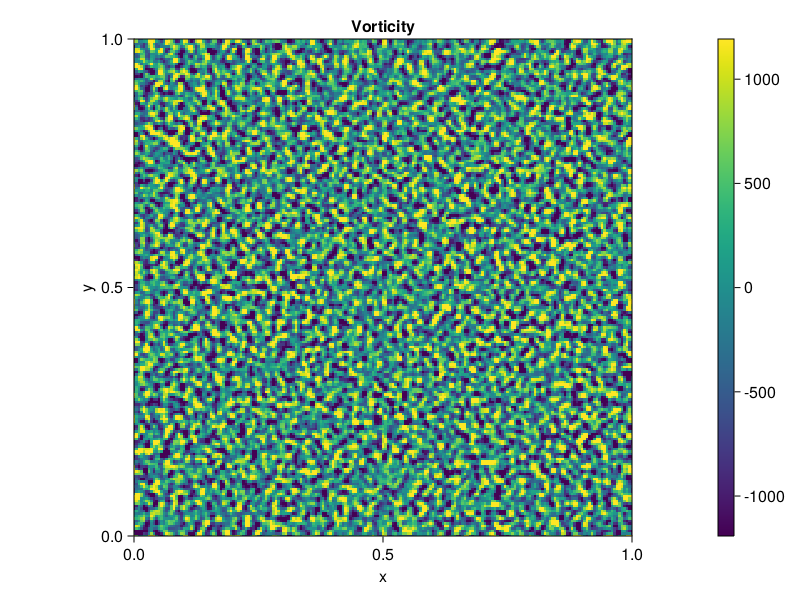

([1.4940943862448322, 1.4486912840489503, 1.3781158850340562, 1.3118845309861842, 1.253526620186702, 1.1833663920231146, 1.1180827386667311, 1.0613958149644414, 1.0027087144463283, 0.9556838738682438  …  -0.8240169969540618, -0.7927575642295356, -0.7722860430610587, -0.7479710737595598, -0.7140544229761495, -0.6938764107335891, -0.6714237591309248, -0.650325471625029, -0.6384188306325078, -0.6393072011476495], [0.0863696443925454, 0.1689761209666872, 0.24491472869819358, 0.3119503014685115, 0.3688989790264849, 0.4143363006942641, 0.44747000833555434, 0.4687569833896883, 0.47912823863231624, 0.48057545131666307  …  -0.9482528771977345, -0.8118989933966697, -0.6857792207306357, -0.5682507089585304, -0.45911177391678154, -0.35686601995949185, -0.2591729201968369, -0.16536491011096288, -0.0747810181297982, 0.014497742652735502])

In [16]:
problem = UnsteadyProblem(setup, V₀, p₀, tlims);
V, p, = solve(problem, RK44(); Δt = 0.001, processors, inplace = true, pressure_solver)

Kinetic energy spectrum

In [17]:
k = 1:K
u = reshape(V[grid.indu], N, N)
v = reshape(V[grid.indv], N, N)
e = u .^ 2 .+ v .^ 2
ehat = fft(e)[k, k]
kk = sqrt.(k .^ 2 .+ (k') .^ 2)

100×100 Matrix{Float64}:
   1.41421    2.23607    3.16228    4.12311  …   98.0051   99.0051  100.005
   2.23607    2.82843    3.60555    4.47214      98.0204   99.0202  100.02
   3.16228    3.60555    4.24264    5.0          98.0459   99.0454  100.045
   4.12311    4.47214    5.0        5.65685      98.0816   99.0808  100.08
   5.09902    5.38516    5.83095    6.40312      98.1275   99.1262  100.125
   6.08276    6.32456    6.7082     7.2111   …   98.1835   99.1817  100.18
   7.07107    7.28011    7.61577    8.06226      98.2497   99.2472  100.245
   8.06226    8.24621    8.544      8.94427      98.326    99.3227  100.319
   9.05539    9.21954    9.48683    9.84886      98.4124   99.4082  100.404
  10.0499    10.198     10.4403    10.7703       98.5089   99.5038  100.499
   ⋮                                         ⋱                      
  92.0054    92.0217    92.0489    92.0869      134.417   135.148   135.882
  93.0054    93.0215    93.0484    93.086       135.104   135.831   136.5

Plot kinetic energy spectrum

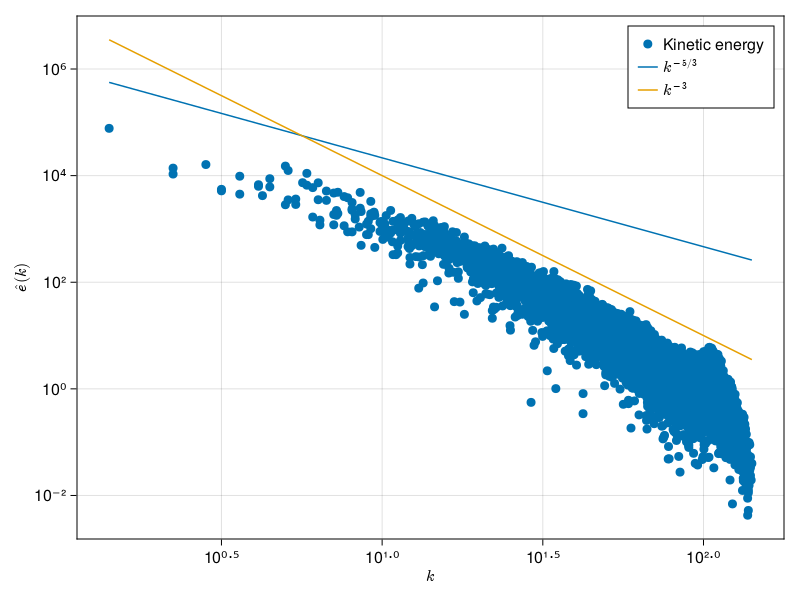

In [18]:
fig = Figure()
ax = Axis(fig[1, 1]; xlabel = L"k", ylabel = L"\hat{e}(k)", xscale = log10, yscale = log10)
# ylims!(ax, (1e-20, 1))
scatter!(ax, kk[:], abs.(ehat[:]); label = "Kinetic energy")
krange = LinRange(extrema(kk)..., 100)
lines!(ax, krange, 1e6 * krange .^ (-5 / 3); label = L"k^{-5/3}")
lines!(ax, krange, 1e7 * krange .^ (-3); label = L"k^{-3}")
axislegend(ax)
fig

Post-process

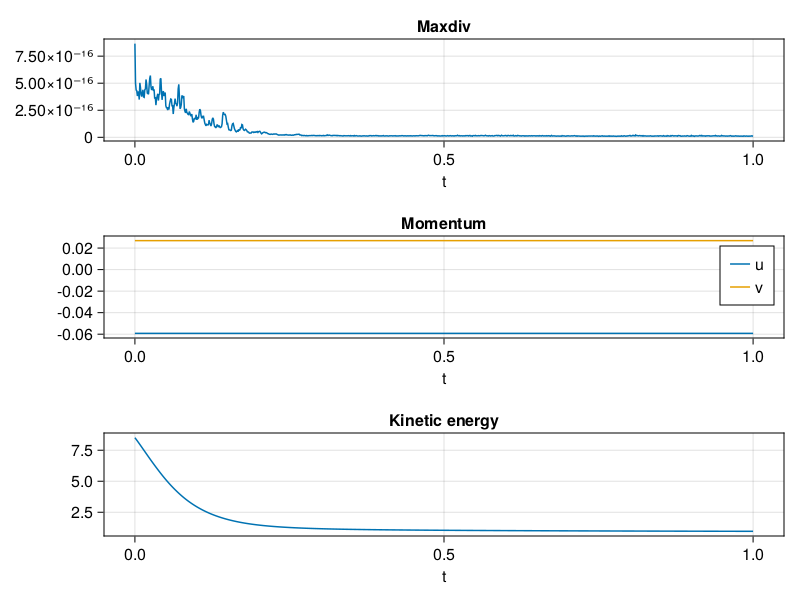

In [19]:
plot_tracers(tracer)

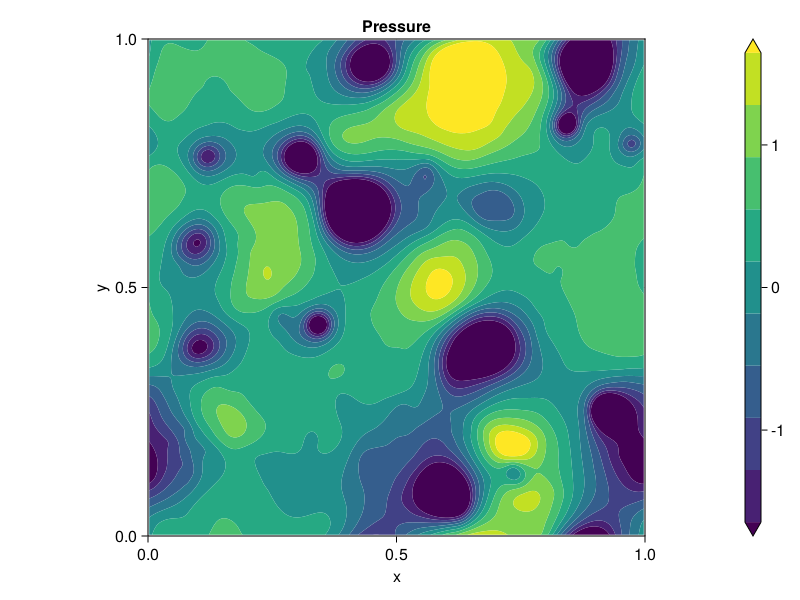

In [20]:
plot_pressure(setup, p)

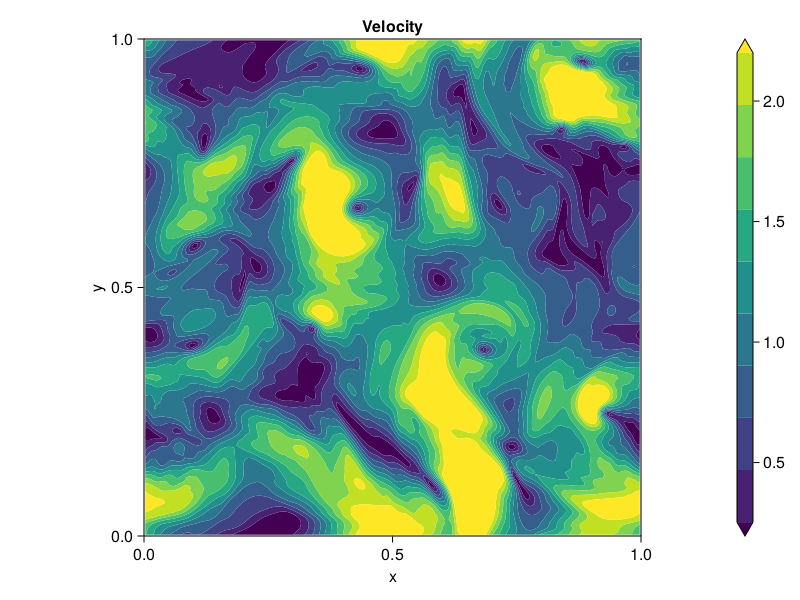

In [21]:
plot_velocity(setup, V, t_end)

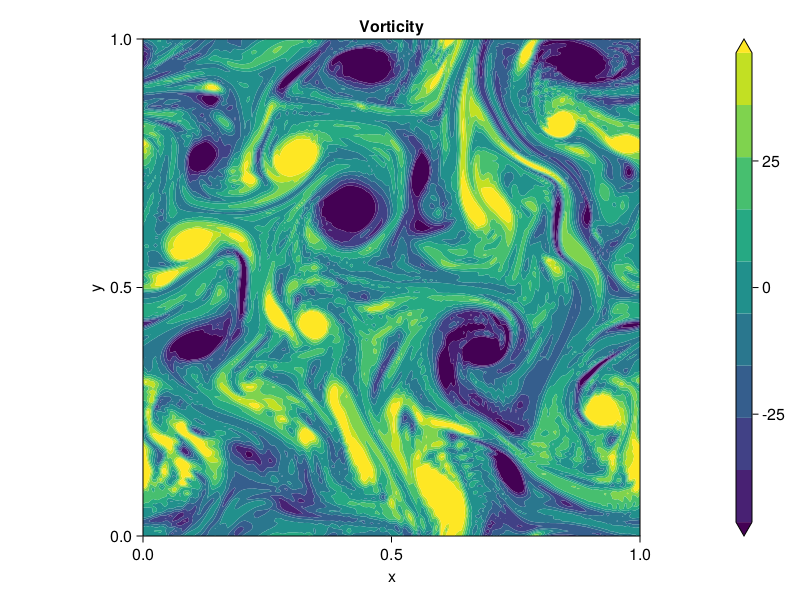

In [22]:
plot_vorticity(setup, V, tlims[2])

In [23]:
# plot_streamfunction(setup, V, tlims[2])

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*